In [ ]:
# 201804239 산업데이터사이언스학부 이희원

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
tel=pd.read_csv('telco.csv')
tel

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [6]:
tel.isna().sum(axis=0)

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

In [ ]:
#결측값이 있는지 확인한다.
#모두 0으로 결측값은 존재하지 않는다.

In [7]:
tel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
#info함수를 통해 각각의 컬럼들의 데이터타입을 확인한다.

In [8]:
tel.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [9]:
tel.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [ ]:
#가입기간 최소 1일 ~ 최대 243일까지 
#데이터 사용량 최소 0 ~ 최대 5.4까지
#월평균 전화량 0분 ~ 350분까지
#월평균 전화수 0회 ~165회까지
#월평균요금 14 ~ 111까지 
#초과요금 0 ~ 18까지 분포돼있음을 파악한다.

In [28]:
tel.assign(Leave=tel.Leave.astype(np.int8),
             MemberWeeks=tel.MemberWeeks.astype(np.int16),
             NewContract=tel.NewContract.astype(np.int8),
             IsData=tel.IsData.astype(np.int8),
             DataAmount=tel.DataAmount.astype(np.float16),
             Callcenter=tel.Callcenter.astype(np.int16),
             CalMins=tel.CalMins.astype(np.int16),
             CalCounts=tel.CalCounts.astype(np.int16),
             MonthlyFee=tel.MonthlyFee.astype(np.float16),
            OverFee=tel.OverFee.astype(np.float16),
            RoamingMin=tel.RoamingMin.astype(np.float16)).info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int8   
 1   MemberWeeks  3333 non-null   int16  
 2   NewContract  3333 non-null   int8   
 3   IsData       3333 non-null   int8   
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   int16  
 6   CalMins      3333 non-null   int16  
 7   CalCounts    3333 non-null   int16  
 8   MonthlyFee   3333 non-null   float16
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(4), int16(4), int8(3)
memory usage: 62.0 KB


In [ ]:
#int 16과 float16으로 변환하고, 0과 1 값만 갖고 있는 바이너리변수는 8비트 정수 형식으로 변환한다.
#메모리 사용량 286.6 KB에서 62.0 KB로 줄어든 것을 확인할 수 있다.

In [37]:
tel.std()

Leave           0.352067
MemberWeeks    39.822106
NewContract     0.295879
IsData          0.447398
DataAmount      1.272668
Callcenter      1.315491
CalMins        54.467389
CalCounts      20.069084
MonthlyFee     16.426032
OverFee         2.535712
RoamingMin      2.791840
dtype: float64

In [ ]:
#각 컬럼들의 표준편차 확인한다.
#월평균 전화량이 가장 크다.

<AxesSubplot:ylabel='Leave'>

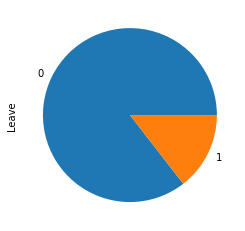

In [43]:
tel['Leave'].value_counts().plot(kind="pie")

In [ ]:
#가입 해지 여부를 파이차트로 살펴본다.
# 1이 해지를 나타내는데 적게 해지한 것을 알 수 있다.

<AxesSubplot:ylabel='NewContract'>

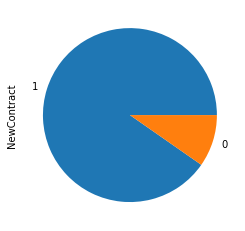

In [52]:
tel['NewContract'].value_counts().plot(kind="pie")

In [ ]:
#가입 갱신 여부를 파이차트로 살펴본다.
# 1이 갱신을 나타내는데 상대적으로 많은 갱신이 이루어진 것을 알 수 있다.

<AxesSubplot:>

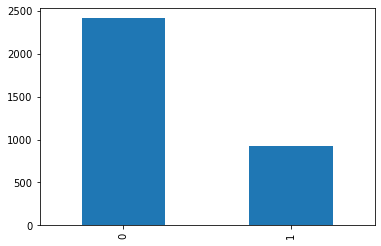

In [48]:
tel['IsData'].value_counts().plot(kind="bar")

In [ ]:
#데이터 요금제 사용여부이다. 
#1이 사용한 것을 뜻하는데 대략 1000명이 사용하고, 약 2400명은 사용하지 않은 것을 알 수 있다.

In [72]:
tel1=tel[['CalCounts','CalMins','MonthlyFee']]
tel1.head()

,CalCounts,CalMins,MonthlyFee
0,110,265.1,89.0
1,123,161.6,82.0
2,114,243.4,52.0
3,71,299.4,57.0
4,113,166.7,41.0


In [ ]:
#필요한 데이터 컬럼만 뽑아서 tel1을 생성한다.

In [78]:
tel1.nlargest(10,'MonthlyFee').head()

,DataAmount,CalMins,MonthlyFee
2122,4.43,268.8,111.3
115,5.40,196.8,110.0
670,4.40,266.7,110.0
1355,3.67,302.7,108.7
1821,4.16,270.4,108.6


In [ ]:
# 월평균요금을 기준으로 최대값을 확인한 결과
# 최대 111.3일때, 월평균 전화수 78회,  월평균 전화량은 268분이다. 
# 하지만 4번째 Row를 살펴보면 302분으로 34분을 더 사용했는데 요금은 더 적었다.
# 따라서 데이터사용량 컬럼을 추가해보고 다시 살펴본다.

In [77]:
tel2=tel[['DataAmount','CalMins','MonthlyFee']]
tel2.nlargest(10,'MonthlyFee').head()

,DataAmount,CalMins,MonthlyFee
2122,4.43,268.8,111.3
115,5.40,196.8,110.0
670,4.40,266.7,110.0
1355,3.67,302.7,108.7
1821,4.16,270.4,108.6


In [ ]:
# 통화시간은 268분, 302분이었지만
# 데이터 사용량이 4.43과 3.67로 0.76차이가 났다.
# 결론적으로 통화시간보다는 데이터 사용량이 월평균요금에 더 큰 영향을 미친다는 것을 알 수 있다.

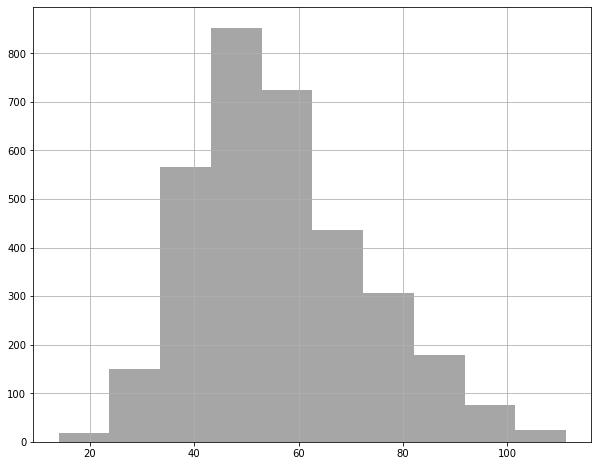

In [127]:
fig,ax=plt.subplots(figsize=(10,8))
tel.MonthlyFee.hist(ax=ax,color='0.65')
fig.savefig("c7-hist.png",dpi=300)

In [84]:
tel.MonthlyFee.mean()

56.30516051605168

In [86]:
high = tel.MonthlyFee>56
high.mean().round(2)

0.42

In [ ]:
#시각화로 월평균요금의 분포를 살펴본다.
#월평균요금이 평균을 구한 결과 56.3이 나왔다. 평균 이상의 요금은 대략 42%를 차지한다.

<AxesSubplot:>

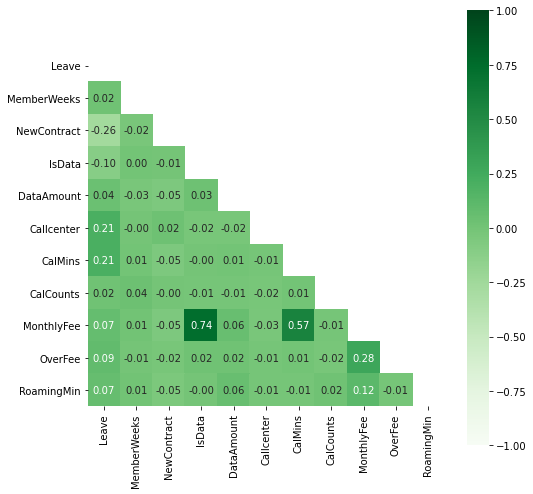

In [110]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = tel.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='Greens',
 vmin=-1,
 vmax=1,
 square=True)

In [105]:
tel.corr(method='pearson')

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
Leave,1.000000,0.016541,-0.259852,-0.102148,0.042082,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
MemberWeeks,0.016541,1.000000,-0.024735,0.002918,-0.028310,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
NewContract,-0.259852,-0.024735,1.000000,-0.006006,-0.052885,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
IsData,-0.102148,0.002918,-0.006006,1.000000,0.028014,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataAmount,0.042082,-0.028310,-0.052885,0.028014,1.000000,-0.020585,0.005416,-0.009873,0.056639,0.018439,0.060589
Callcenter,0.208750,-0.003796,0.024522,-0.017824,-0.020585,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
CalMins,0.205151,0.006216,-0.049396,-0.001684,0.005416,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
CalCounts,0.018459,0.038470,-0.003755,-0.011086,-0.009873,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyFee,0.072313,0.012581,-0.047291,0.737490,0.056639,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverFee,0.092812,-0.006749,-0.019105,0.021526,0.018439,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [ ]:
#히트맵과 함수를 통해 상관관계를 확인한다.
#각 컬럼들 사이의 상관관계는 대부분 없으며, 그나마 제일 상관계수가 높은 것은 IsData와 MOnthlyFee로 0.74이다.

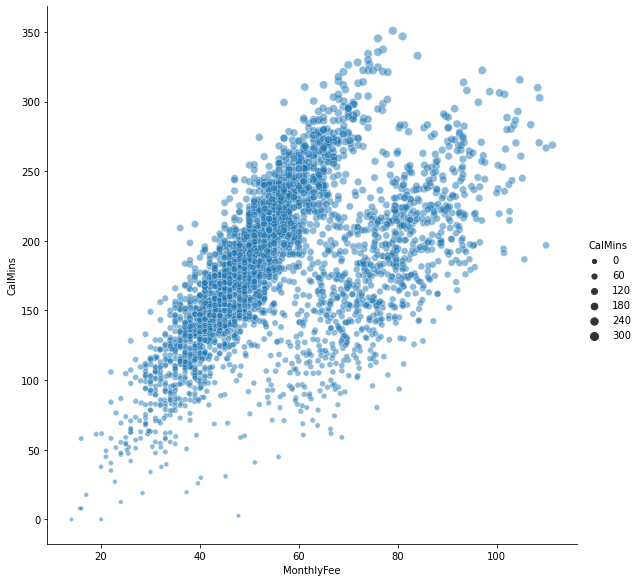

In [66]:
sns.relplot(
 x='MonthlyFee',
 y='CalMins',
 data=tel,
 size='CalMins',
 alpha=.5, 
 height=8)

In [ ]:
# 월평균전화량과 월평균요금의 산포도이다. 
# 월평균전화시간이 길어질수록 월평균 요금이 증가하는 양의관계를 띄고 있다.

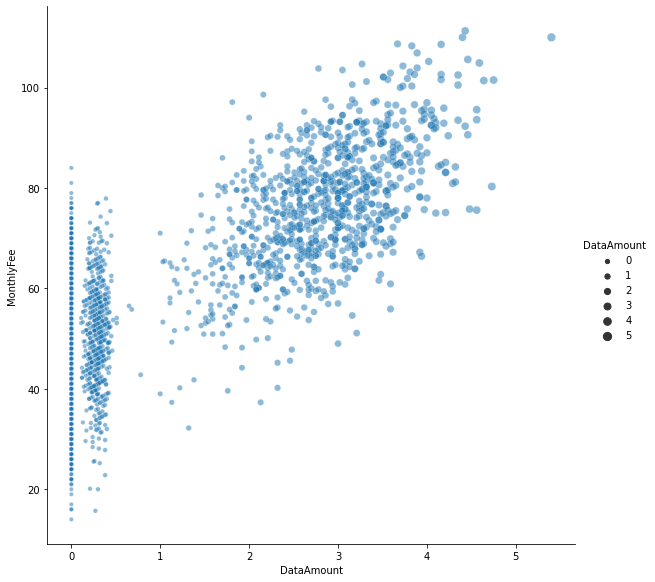

In [63]:
sns.relplot(
 x='DataAmount',
 y='MonthlyFee',
 data=tel,
 size='DataAmount',
 alpha=.5, 
 height=8)

In [ ]:
#데이터사용량과 월평균요금의 산포도이다. 
#데이터 사용량이 증가할수록 월평균 요금도 높은 값을 띄는 양의 관계이다.

In [119]:
(tel.groupby(['NewContract','IsData'])
      .agg({'MonthlyFee':['sum','mean'],'OverFee':['sum','mean']}))

MonthlyFee              OverFee           
                          sum       mean       sum       mean
NewContract IsData                                           
0           0         11634.5  50.365801   2345.73  10.154675
            1          7317.9  79.542391    948.66  10.311522
1           0        106058.5  48.650688  21807.04  10.003229
            1         62654.2  75.486988   8400.18  10.120699

In [ ]:
#가입 갱신과 데이터요금제 둘 다 해당사항이 없는 사람들
월평균요금의 합은 11634이고, 평균은 50이다.
초과요금의 합은 2345이고, 평균은 10이다.

#가입 갱신은 하지 않았지만 데이터요금제는 사용한 사람들
월평균요금의 합은 7317이고, 평균은 79이다.
초과요금의 합은 948이고, 평균은 10이다.

#가입갱신은 했지만 데이터요금제를 사용하지 않은 사람들
월평균요금의 합은 106058이고, 평균은 48이다.
초과요금의 합은 21807이고, 평균은 10이다.

#가입갱신과 데이터요금제 둘 다 해당사항이 있는 사람들
월평균요금의 합은 62654이고, 평균은 75이다.
초과요금의 합은 8400이고, 평균은 10이다.